# Flight Fare Prediction
--------------------------------------

![Flight](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/25317plane.jpg)

Predict The Flight Ticket Price Hackathon
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket



In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading the Data_Train dataset

train = pd.read_excel(r'C:\Users\sssun\Downloads\data fsds\Flight fare prediction dataset\Data_Train.xlsx')
pd.set_option('display.max_columns', None)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Shape of the train dataset

train.shape

(10683, 11)

In [4]:
# Loading the Test_set dataset

test = pd.read_excel(r'C:\Users\sssun\Downloads\data fsds\Flight fare prediction dataset\Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
# Shape of the test dataframe

test.shape

(2671, 10)

In [6]:
# Information about the train data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# Creating a copy of this dataframe

data = train.copy()

## Feature Engeneering

In [8]:
# Creating a new column for day, month and year in int format. 

data['Journey_date'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data['Journey_month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month
data['Journey_year'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.year

In [9]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [10]:
# For checking unique year in Journey_year column

data['Journey_year'].unique()

array([2019], dtype=int64)

In [11]:
# As there is only one year i.e - 2019, so we drop the year column

data.drop(['Journey_year'], axis=1, inplace=True)

In [12]:
# dropping the Date_of_Journey column as it is of no use

data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [13]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [14]:
# For resolving time of departure two new columns are created for hour and minute

data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [15]:
# dropping the Dep_Time column as it is of no use

data.drop(['Dep_Time'], axis=1, inplace=True)
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [16]:
# For resolving arrival time two new columns are created for hour and minute

data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute
# data['Arrival_Date']=pd.to_datetime(data['Arrival_Time']).dt.day
# data['Arrival_month']=pd.to_datetime(data['Arrival_Time']).dt.month

data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [17]:
# dropping the Arrival_Time column as it is of no use

data.drop(['Arrival_Time'], axis=1, inplace=True)
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [18]:
# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [19]:
## dropping the Duration column as it is of no use

data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
# Checking for null vlaues

data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_date       0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Journey_date     10683 non-null  int64 
 8   Journey_month    10683 non-null  int64 
 9   Dep_hour         10683 non-null  int64 
 10  Dep_min          10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Duration_hours   10683 non-null  int64 
 14  Duration_mins    10683 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_date,10683.0,13.508378,8.479277,1.0,6.0,12.0,21.0,27.0
Journey_month,10683.0,4.708602,1.164357,3.0,3.0,5.0,6.0,6.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
Arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
Arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0
Duration_hours,10683.0,10.246092,8.495414,0.0,2.0,8.0,15.0,47.0
Duration_mins,10683.0,28.327717,16.945400,0.0,15.0,30.0,45.0,55.0


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

1.Nominal data --> data are not in any order --> OneHotEncoder is used in this case

2.Ordinal data --> data are in order --> LabelEncoder is used in this case

In [23]:
# Checking for null value in Total_stop column

data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,6,5,9,45,9,25,23,40


In [24]:
#Checking for the unique values in total_stops column

data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [25]:
#Filling the nan value as 1 stop
data['Total_Stops'] = data['Total_Stops'].fillna('1 stop')

#Replacing the non-stop as 0 stop
data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stops')

In [26]:
data["Total_Stops"].value_counts()

1 stop     5626
0 stops    3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

In [27]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data.replace({'0 stops':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [28]:
data.groupby('Route')['Total_Stops'].mean()

Route
BLR → AMD → DEL                1.0
BLR → BBI → DEL                1.0
BLR → BDQ → DEL                1.0
BLR → BOM → AMD → DEL          2.0
BLR → BOM → BHO → DEL          2.0
                              ... 
DEL → PNQ → COK                1.0
DEL → RPR → NAG → BOM → COK    3.0
DEL → TRV → COK                1.0
DEL → UDR → BOM → COK          2.0
MAA → CCU                      0.0
Name: Total_Stops, Length: 128, dtype: float64

In [29]:
# Route and Total_Stops are related to each other
# No.of steps is equal to no.of station present between 1st and last station, so we drop the route column

data.drop(["Route"], axis = 1, inplace = True)

In [30]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [31]:
# As there is Additional_Info contains almost 80% no_info, we drop this column

data.drop(['Additional_Info'],axis= 1, inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


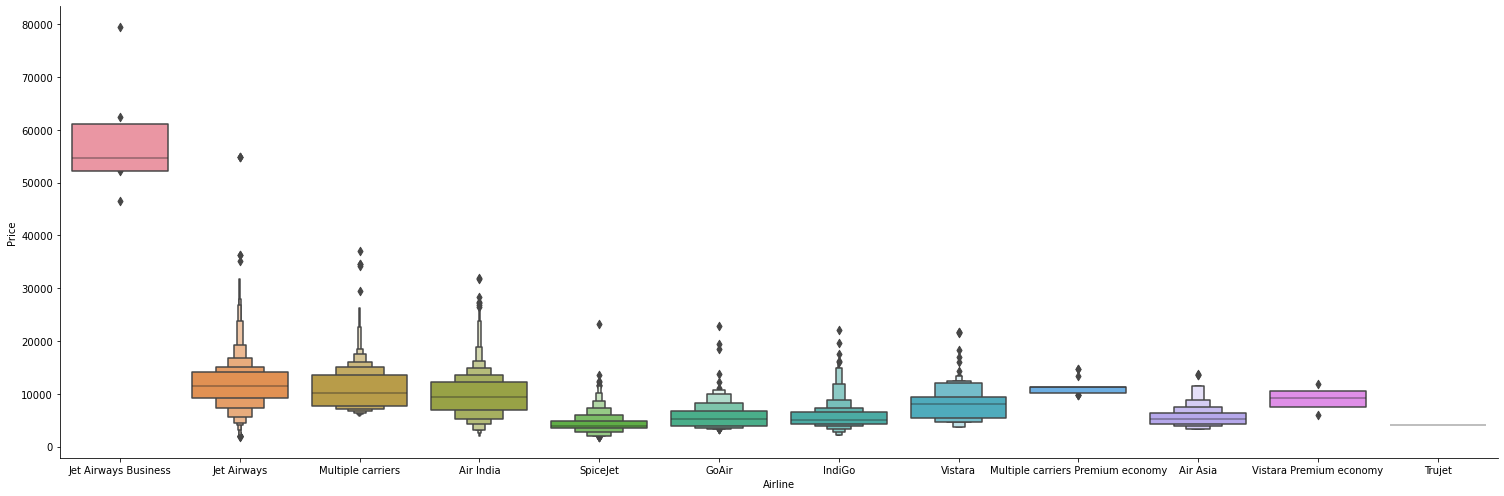

In [32]:
# Visualization of price vs airline

sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show()

##### Observation
From graph we can see that Jet Airways Business have the highest Price

In [33]:
data["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

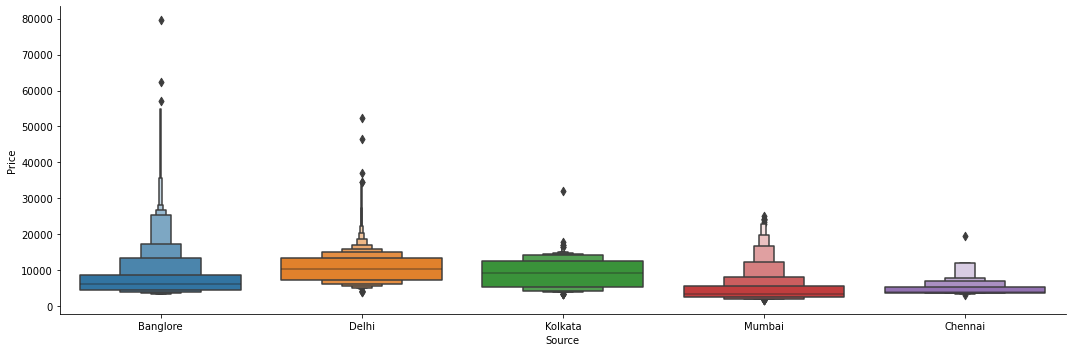

In [34]:
# Visualization of price vs source

sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

In [35]:
data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

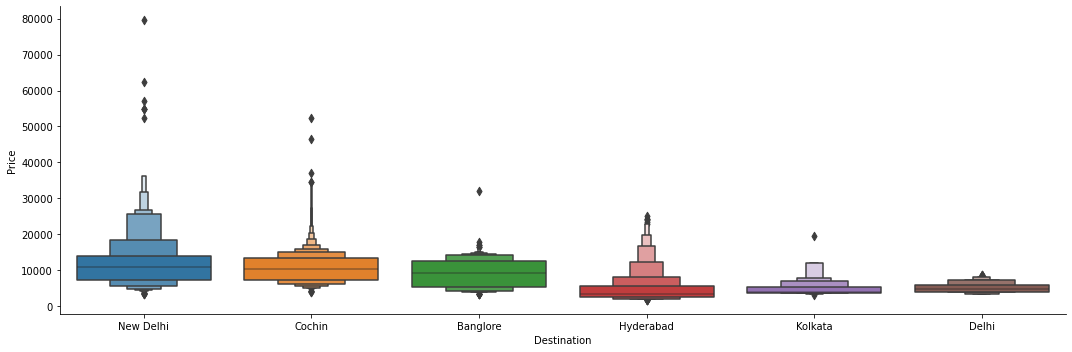

In [36]:
# Visualization of price vs Destination

sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.show()

In [37]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
#As Source is Nominal Categorical data we will perform OneHotEncoding
new_data = pd.get_dummies(data, columns = ['Airline', 'Source', 'Destination'], drop_first=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_date', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

## Test dataset

In [39]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [40]:
# Creating a copy of this dataframe

data1 = test.copy()

In [41]:
# Shape of the test dataset

data1.shape

(2671, 10)

In [42]:
# Information about the test data

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [43]:
# Checking for missing values

data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [44]:
# # Creating a new column for day, month and year in int format. As there is only one year i.e - 2019, so we don't consider year
# data1['Journey_date'] = pd.to_datetime(data1.Date_of_Journey, format='%d/%m/%Y').dt.day
# data1['Journey_month'] = pd.to_datetime(data1.Date_of_Journey, format='%d/%m/%Y').dt.month


In [45]:
# Creating a new column for day, month and year in int format. As there is only one year i.e - 2019, so we don't consider year
data1['Journey_date'] = pd.to_datetime(data1.Date_of_Journey, format='%d/%m/%Y').dt.day
data1['Journey_month'] = pd.to_datetime(data1.Date_of_Journey, format='%d/%m/%Y').dt.month

In [46]:
# For resolving time of departure two new columns are created for hour and minute
data1['Dep_hour'] = pd.to_datetime(data1['Dep_Time']).dt.hour
data1['Dep_min'] = pd.to_datetime(data1['Dep_Time']).dt.minute

In [47]:
# For resolving arrival time two new columns are created for hour and minute
data1['Arrival_hour']=pd.to_datetime(data1['Arrival_Time']).dt.hour
data1['Arrival_min']=pd.to_datetime(data1['Arrival_Time']).dt.minute
# data1['Arrival_Date']=pd.to_datetime(data1['Arrival_Time']).dt.day
# data1['Arrival_month']=pd.to_datetime(data1['Arrival_Time']).dt.month

In [48]:
# Assigning and converting Duration column into list
duration = list(data1["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe
data1["Duration_hours"] = duration_hours
data1["Duration_mins"] = duration_mins

In [49]:
# dropping these column as these column has no use
data1.drop(['Date_of_Journey', 'Dep_Time',  'Arrival_Time', 'Duration'], axis=1, inplace=True)

In [50]:
# Checking for null value in Total_stop column
data1['Total_Stops'].isnull().sum()

0

In [51]:
# Checking for unique values in Total_stops column
data1['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [52]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
data1.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [53]:
data1.groupby('Route')['Total_Stops'].mean()

Route
BLR → AMD → DEL                1.0
BLR → BBI → DEL                1.0
BLR → BDQ → DEL                1.0
BLR → BOM → AMD → DEL          2.0
BLR → BOM → BHO → DEL          2.0
                              ... 
DEL → PNQ → COK                1.0
DEL → RPR → NAG → BOM → COK    3.0
DEL → TRV → COK                1.0
DEL → UDR → BOM → COK          2.0
MAA → CCU                      0.0
Name: Total_Stops, Length: 100, dtype: float64

In [54]:
# Route and Total_Stops are related to each other
# No.of steps is equal to no.of station present between 1st and last station, so we drop the route column
data1.drop(["Route"], axis = 1, inplace = True)

In [55]:
data1['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [56]:
data1.drop(['Additional_Info'],axis= 1, inplace=True)
data1.head()

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [57]:
# As Airline, Source, Destination are nominal categorical data we will perform OneHotEncoding
data1 = pd.get_dummies(data1, columns = ['Airline', 'Source', 'Destination'], drop_first=True)
data1.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Plotting Bar chart for Months (Duration) vs Number of Flights

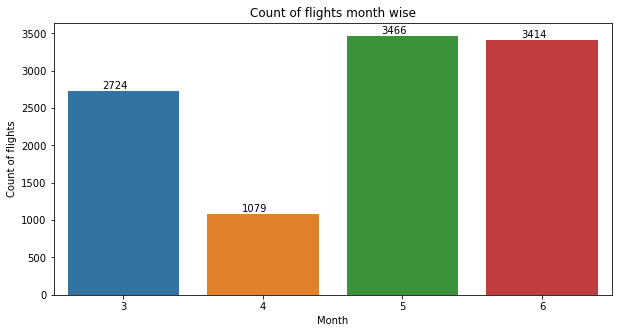

In [58]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

##### Inference: 
Here in the above graph we have plotted the count plot for journey in a month vs several flights and got to see that May has the most number of flights.

### Plotting Bar chart for Types of Airline vs Number of Flights

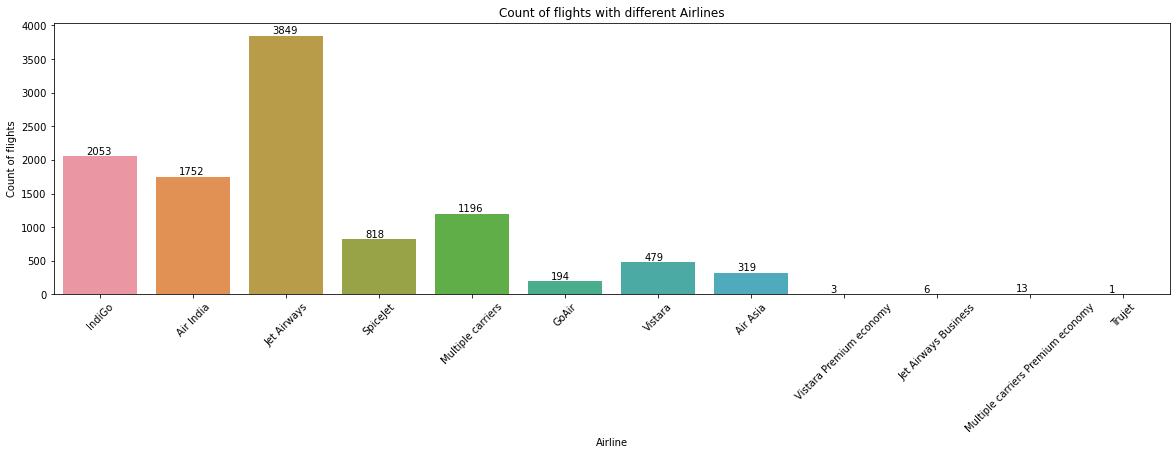

In [59]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

##### Inference:
Now from the above graph we can see that between the type of airline and count of flights we can see that Jet Airways has the most flight boarded.

### Plotting Ticket Prices VS Airlines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

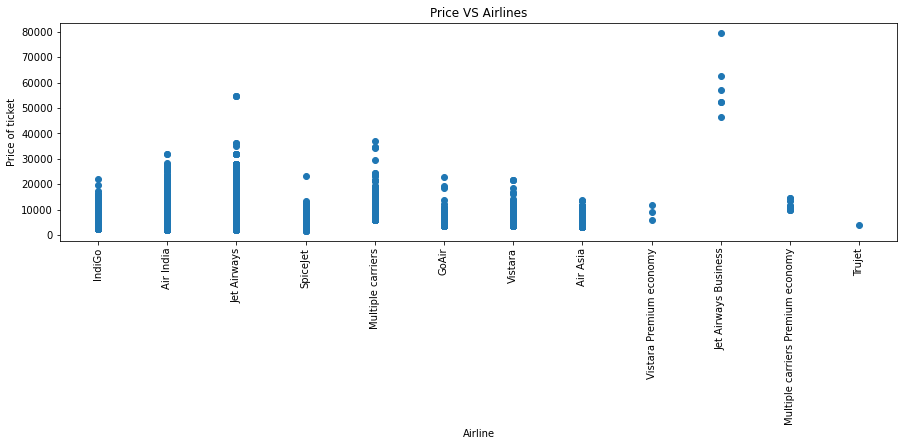

In [60]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)


## Feature Selection

In [61]:
# Separating the Independent and depended features

data_train = new_data.iloc[0: 10683]
data_test = new_data.iloc[10683:]

In [62]:
# Independent features
X = data_train.drop(['Price'], axis=1)

#Dependend Feature
y = data_train.Price

In [63]:
X.columns = X.columns.str.replace(' ', '')
X.columns = X.columns.str.replace('_', ' ')

In [64]:
X.head()

,Total Stops,Journey date,Journey month,Dep hour,Dep min,Arrival hour,Arrival min,Duration hours,Duration mins,Airline AirIndia,Airline GoAir,Airline IndiGo,Airline JetAirways,Airline JetAirwaysBusiness,Airline Multiplecarriers,Airline MultiplecarriersPremiumeconomy,Airline SpiceJet,Airline Trujet,Airline Vistara,Airline VistaraPremiumeconomy,Source Chennai,Source Delhi,Source Kolkata,Source Mumbai,Destination Cochin,Destination Delhi,Destination Hyderabad,Destination Kolkata,Destination NewDelhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

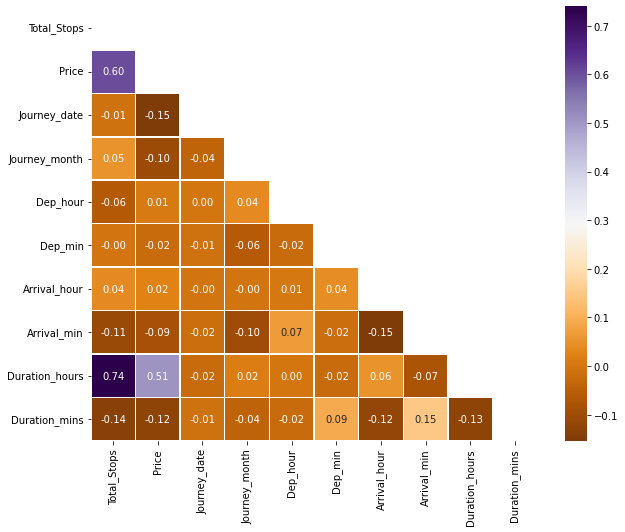

In [66]:
# Using Heatmap Correlation Analysis

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(),mask= mask, annot=True, fmt='.2f', linewidths=0.5, cmap='PuOr')

In [67]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [68]:
print(selection.feature_importances_)

[2.30143878e-01 1.43860984e-01 5.30096379e-02 2.42305792e-02
 2.16979898e-02 2.80443356e-02 1.80773637e-02 1.37605790e-01
 1.77624490e-02 1.01540481e-02 2.21622502e-03 1.71879154e-02
 1.28793467e-01 6.73022302e-02 1.80304875e-02 8.59926801e-04
 3.35364101e-03 8.48048993e-05 5.20896597e-03 7.37035068e-05
 4.76308401e-04 9.44801764e-03 3.35874117e-03 5.50218231e-03
 7.70374927e-03 1.30577449e-02 7.53567422e-03 3.53021927e-04
 2.48661365e-02]


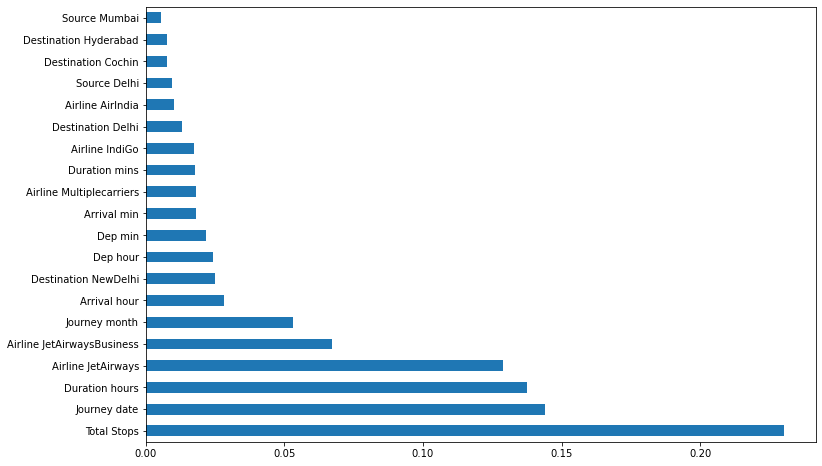

In [69]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test

If needed do scaling of data

Scaling is not done in Random forest

Import model

Fit the data

Predict w.r.t X_test

In regression check RSME Score

Plot graph

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
y_pred = reg_rf.predict(X_test)

In [73]:
reg_rf.score(X_train, y_train)

0.9552880670494638

In [74]:
reg_rf.score(X_test, y_test)

0.7873738727261627

<AxesSubplot:xlabel='Price', ylabel='Density'>

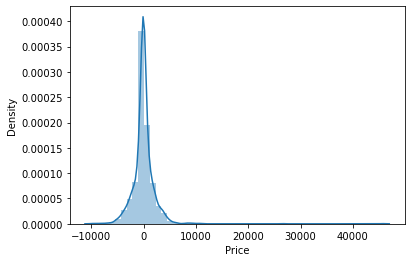

In [75]:
sns.distplot(y_test-y_pred)

Text(0, 0.5, 'y_pred')

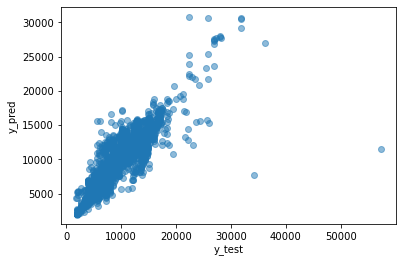

In [76]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [77]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1191.64700128047
MSE: 4343393.624185175
RMSE: 2084.0810023089734


In [78]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [79]:
metrics.r2_score(y_test, y_pred)

0.7873738727261627

## Hyperparameter Tuning
Choose following method for hyperparameter tuning
RandomizedSearchCV
Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score

In [80]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15,20, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 8,10,12]

In [81]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 16, 28, 40],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 5, 8, 10,
                                                             12],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [50, 155, 261, 366, 472,
                                                         577, 683, 788, 894,
                                                         1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 16}

In [85]:
prediction = rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

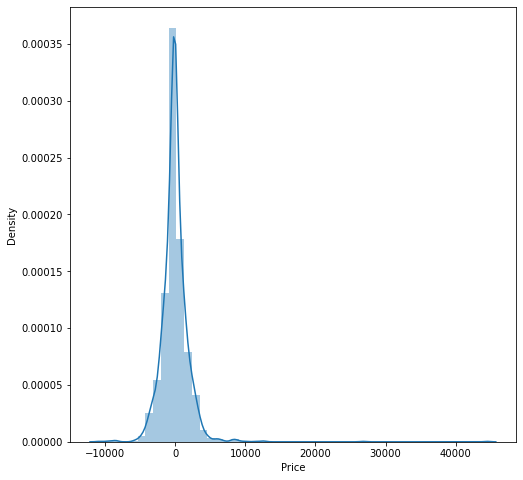

In [86]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)

Text(0, 0.5, 'y_pred')

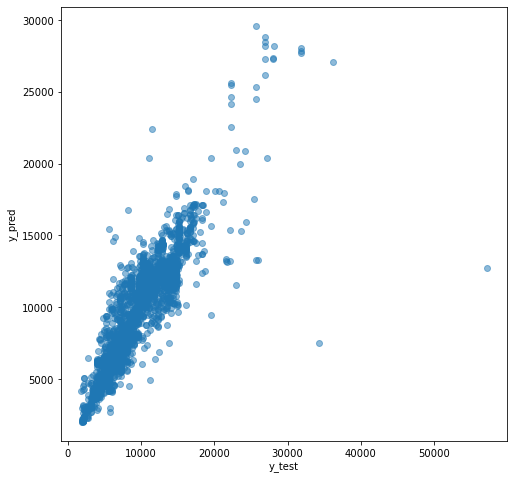

In [87]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")

## Save the model to reuse it again

In [88]:
import pickle
# open a file, where you ant to store the data
file = open('flight_price_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [89]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [90]:
y_prediction = forest.predict(X_test)

In [91]:
metrics.r2_score(y_test, y_prediction)

0.7873738727261627

In [92]:
X_test.dtypes

Total Stops                               int64
Journey date                              int64
Journey month                             int64
Dep hour                                  int64
Dep min                                   int64
Arrival hour                              int64
Arrival min                               int64
Duration hours                            int64
Duration mins                             int64
Airline AirIndia                          uint8
Airline GoAir                             uint8
Airline IndiGo                            uint8
Airline JetAirways                        uint8
Airline JetAirwaysBusiness                uint8
Airline Multiplecarriers                  uint8
Airline MultiplecarriersPremiumeconomy    uint8
Airline SpiceJet                          uint8
Airline Trujet                            uint8
Airline Vistara                           uint8
Airline VistaraPremiumeconomy             uint8
Source Chennai                          

In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 752 to 7270
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Total Stops                             8012 non-null   int64
 1   Journey date                            8012 non-null   int64
 2   Journey month                           8012 non-null   int64
 3   Dep hour                                8012 non-null   int64
 4   Dep min                                 8012 non-null   int64
 5   Arrival hour                            8012 non-null   int64
 6   Arrival min                             8012 non-null   int64
 7   Duration hours                          8012 non-null   int64
 8   Duration mins                           8012 non-null   int64
 9   Airline AirIndia                        8012 non-null   uint8
 10  Airline GoAir                           8012 non-null   uint8
 11  Airline IndiGo 